In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
from scipy import stats

In [11]:
cx = pd.DataFrame({'subject': ['Segundo', 'Valentino', 'Doppio', 'Alessandro', 'Allan'], 'rebound': [174.701, 103.316, 157.888, 108.193, 188.973]}).set_index('subject')
print(cx.to_markdown())

| subject    |   rebound |
|:-----------|----------:|
| Segundo    |   174.701 |
| Valentino  |   103.316 |
| Doppio     |   157.888 |
| Alessandro |   108.193 |
| Allan      |   188.973 |


In [12]:
stats.ttest_1samp(cx, 0)

Ttest_1sampResult(statistic=array([8.42196138]), pvalue=array([0.00108829]))

In [13]:
hc = pd.DataFrame({'subject': ['Segundo', 'Valentino', 'Doppio', 'Alessandro', 'Allan'], 'rebound': [42.2262, 36.078, 43.596, 41.0528, 33.8323]}).set_index('subject')
print(hc.to_markdown())

| subject    |   rebound |
|:-----------|----------:|
| Segundo    |   42.2262 |
| Valentino  |   36.078  |
| Doppio     |   43.596  |
| Alessandro |   41.0528 |
| Allan      |   33.8323 |


In [14]:
stats.ttest_1samp(hc, 0)

Ttest_1sampResult(statistic=array([20.98464017]), pvalue=array([3.04788573e-05]))

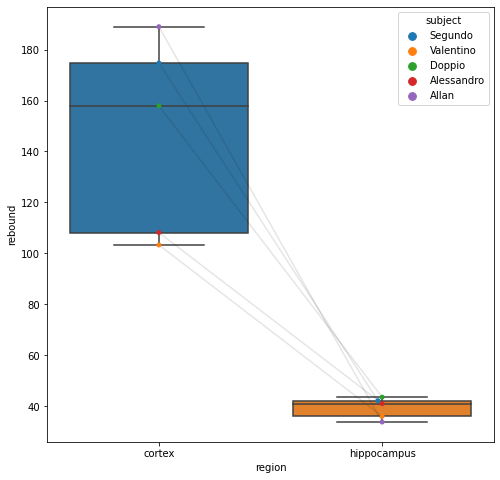

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def join_swarm_points(df, ax, x_variable):
    left_key, right_key = df.index.get_level_values(x_variable).unique()

    left_pts = ax.get_children()[0].get_offsets()
    right_pts = ax.get_children()[1].get_offsets()

    for subject_name in df.index.get_level_values('subject').unique():
        left_val = df.xs((left_key, subject_name))
        right_val = df.xs((right_key, subject_name))
        left_pt_idx = np.argwhere(np.isclose(left_pts, left_val)).squeeze()[0]
        right_pt_idx = np.argwhere(np.isclose(right_pts, right_val)).squeeze()[0]
        x = [left_pts[left_pt_idx, 0], right_pts[right_pt_idx, 0]]
        y = [left_pts[left_pt_idx, 1], right_pts[right_pt_idx, 1]]
        ax.plot(x, y, color='black', alpha=0.1)
        
df = pd.concat([cx, hc], keys=['cortex', 'hippocampus'], names=['region', 'subject'])

fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=df.reset_index(), x='region', y='rebound', ax=ax)
sns.swarmplot(data=df.reset_index(), x='region', y='rebound', hue='subject', ax=ax)
join_swarm_points(df, ax, 'region')